# Natural Computing

## Exercises on Evolutionary Computation (Assignment 1)

### Exercise 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# set seed
np.random.seed(0)

Define Parameters

In [2]:
l = 100 # bit string length
p = 1 / l # mutation rate

iters = 1500 # number of iterations
runs = 10 # number of runs

In [3]:
def bit_flip(x):
    """
    @description:
        function to flip bit values of x based on 
        mutation probability p
    """
    test = np.random.uniform()
    if test < p:
        x ^= 1 # bitwise XOR operation
    return x

In [4]:
def counting_ones(l, p, iters):
    """
    @description:
        function to implement the (1+1)-GA for solving the 
        Counting Ones problem
    @arguments:
        l (int) - length of bit sequence
        p (float) - mutation rate/probability
        iters (int) - number of iterations per run
    @returns:
        xs (ndarray) - array of fitness function outputs
    """
    x = np.random.randint(2, size=l) # randomly generate a bit sequence x
    xs = [np.sum(x)] # store fitness

    for i in np.arange(iters):
        # flip bits of sequence with probability p
        x_m = np.array(list(map(bit_flip, x)))
        old_fitness = xs[i]
        new_fitness = np.sum(x_m)
        if new_fitness > old_fitness:
            x = x_m
            xs.append(new_fitness)  
        else:
            xs.append(old_fitness)
            
    return xs

#### Exercise 4a

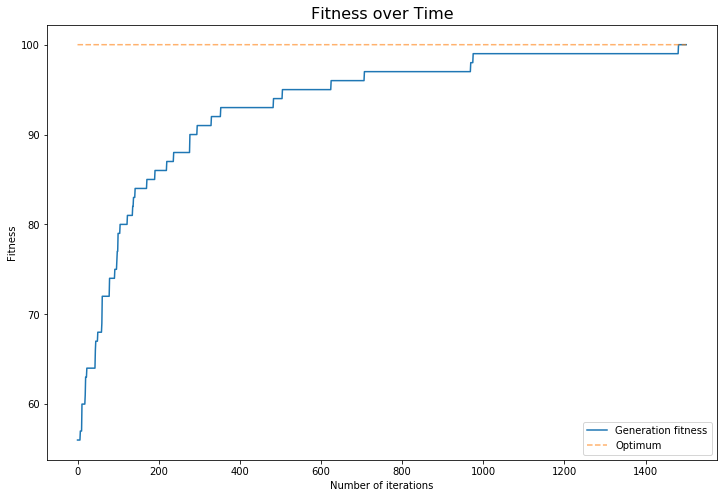

In [5]:
# compute generations
generations = counting_ones(l, p, iters)

# plot results
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters+1), generations, label="Generation fitness")
plt.plot(np.arange(iters+1), [100] * (iters+1), '--', alpha=0.6, label="Optimum")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title("Fitness over Time", fontsize=16)
plt.legend()
# plt.savefig("figures/ex4a.png")
plt.show()

#### Exercise 4b

In [6]:
opt = l # optimum of Counting Ones problem
count_opt = 0
for _ in np.arange(runs):
    generations = counting_ones(l, p, iters)
    if np.amax(generations) == opt:
        count_opt += 1

print(f"Optimum count: {count_opt}/{runs}")

Optimum count: 8/10


#### Exercise 4c

In [7]:
def counting_ones_(l, p, iters):
    """
    @description:
        function to implement the (1+1)-GA for solving the 
        Counting Ones problem (modified for ex 4c)
    @arguments:
        l (int) - length of bit sequence
        p (float) - mutation rate/probability
        iters (int) - number of iterations per run
    @returns:
        xs (ndarray) - array of fitness function outputs
    """
    x = np.random.randint(2, size=l) # randomly generate a bit sequence x
    xs = [np.sum(x)] # store fitness

    for i in np.arange(iters):
        # flip bits of sequence with probability p
        x_m = np.array(list(map(bit_flip, x)))
        old_fitness = xs[i]
        new_fitness = np.sum(x_m)
        x = x_m
        # add best fitness
        if new_fitness > old_fitness:
            xs.append(new_fitness) 
        else:
            xs.append(xs[i])
            
    return xs

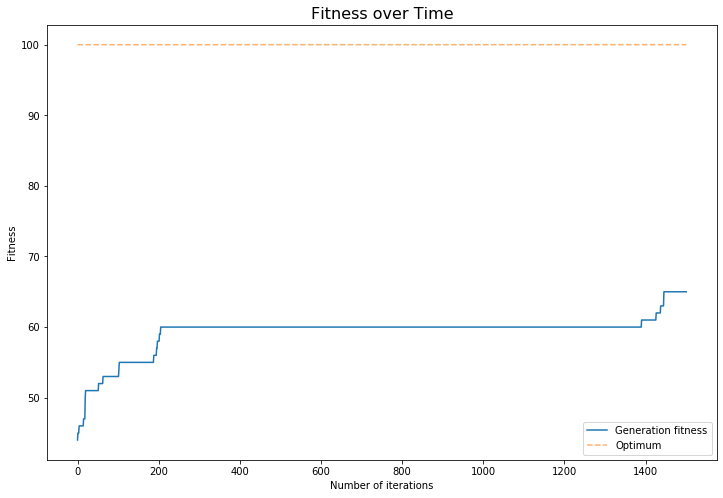

In [8]:
# compute generations
generations = counting_ones_(l, p, iters)

# plot results
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters+1), generations, label="Generation fitness")
plt.plot(np.arange(iters+1), [100] * (iters+1), '--', alpha=0.6, label="Optimum")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title("Fitness over Time", fontsize=16)
plt.legend()
# plt.savefig("figures/ex4c.png")
plt.show()

In [9]:
opt = l # optimum of Counting Ones problem
count_opt = 0
max_in_runs = []
for _ in np.arange(runs):
    generations = counting_ones_(l, p, iters)
    if np.amax(generations) == opt:
        count_opt += 1
    max_in_runs.append(generations[-1])
    

print(f"Optimum count: {count_opt}/{runs}")
print(f"Max fitness over runs: {max_in_runs}")

Optimum count: 0/10
Max fitness over runs: [62, 60, 64, 63, 63, 63, 62, 60, 64, 62]
